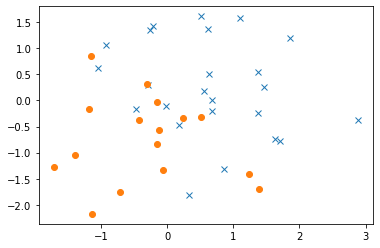

In [2]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [3]:
A = np.array([[3,0.5],[0.5,1]])
Mu = ([1],[2])

[[0.81818182]
 [1.09090909]]


(-1.5, 3.0)

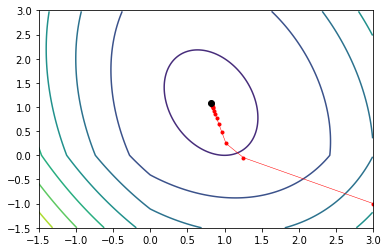

In [4]:
lam = 2
#lam = 4
#lam = 6

def st_ops(Mu,q):
    x_pro = np.zeros(Mu.shape)
    for i in range(len(Mu)):
        if Mu[i] > q:
            x_pro[i] = Mu[i]-q
        else:
            if Mu[i] > -q:
                x_pro[i] = 0
            else:
                x_pro[i] = Mu[i]+q
    return x_pro


x_1 = np.arange(-1.5, 3, 0.01)
x_2 = np.arange(-1.5, 3, 0.02)

X1,X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
fValue = np.zeros((len(x_1),len(x_2)))

for i in range(len(x_1)):
    for j in range(len(x_2)):
        inr = np.vstack([x_1[i],x_2[j]])
        fValue[i,j] = np.dot(np.dot((inr-Mu).T,A),(inr-Mu)) + lam*(np.abs(x_1[i])+np.abs(x_2[j]))

w_lasso = cv.Variable((2,1))
obj_fn = cv.quad_form(w_lasso-Mu,A) + lam*cv.norm(w_lasso,1)
objective = cv.Minimize(obj_fn)
constraints = []
prob = cv.Problem(objective,constraints)
result = prob.solve(solver=cv.CVXOPT)
w_lasso = w_lasso.value    
plt.contour(X1,X2,fValue)

x_init = np.array([[3],[-1]])
L = 1.01*np.max(np.linalg.eig(2*A)[0])
x_history = []
xt = x_init
for t in range(1000):
    x_history.append(xt.T)
    grad = 2*np.dot(A,xt-Mu)
    xth = xt - 1/L*grad
    xt = st_ops(xth, lam*1/L)

print(xt)
x_history = np.vstack(x_history)
plt.plot(x_history[:,0],x_history[:,1],'ro-',markersize=3,linewidth=0.5)
plt.plot(w_lasso[0],w_lasso[1],'ko')

plt.xlim(-1.5,3)
plt.ylim(-1.5,3)

[[0.63636364]
 [0.18181818]]


(-1.5, 3.0)

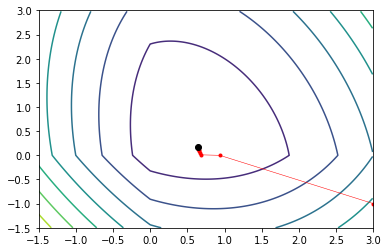

In [5]:
lam = 4

x_1 = np.arange(-1.5, 3, 0.01)
x_2 = np.arange(-1.5, 3, 0.02)

X1,X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
fValue = np.zeros((len(x_1),len(x_2)))

for i in range(len(x_1)):
    for j in range(len(x_2)):
        inr = np.vstack([x_1[i],x_2[j]])
        fValue[i,j] = np.dot(np.dot((inr-Mu).T,A),(inr-Mu)) + lam*(np.abs(x_1[i])+np.abs(x_2[j]))

w_lasso = cv.Variable((2,1))
obj_fn = cv.quad_form(w_lasso-Mu,A) + lam*cv.norm(w_lasso,1)
objective = cv.Minimize(obj_fn)
constraints = []
prob = cv.Problem(objective,constraints)
result = prob.solve(solver=cv.CVXOPT)
w_lasso = w_lasso.value    
plt.contour(X1,X2,fValue)

x_init = np.array([[3],[-1]])
L = 1.01*np.max(np.linalg.eig(2*A)[0])
x_history = []
xt = x_init
for t in range(1000):
    x_history.append(xt.T)
    grad = 2*np.dot(A,xt-Mu)
    xth = xt - 1/L*grad
    xt = st_ops(xth, lam*1/L)
    
print(xt)
x_history = np.vstack(x_history)
plt.plot(x_history[:,0],x_history[:,1],'ro-',markersize=3,linewidth=0.5)
plt.plot(w_lasso[0],w_lasso[1],'ko')

plt.xlim(-1.5,3)
plt.ylim(-1.5,3)

[[0.33333333]
 [0.        ]]


(-1.5, 3.0)

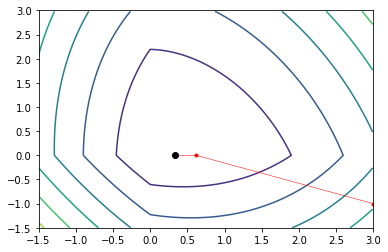

In [6]:
lam = 6

x_1 = np.arange(-1.5, 3, 0.01)
x_2 = np.arange(-1.5, 3, 0.02)

X1,X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
fValue = np.zeros((len(x_1),len(x_2)))

for i in range(len(x_1)):
    for j in range(len(x_2)):
        inr = np.vstack([x_1[i],x_2[j]])
        fValue[i,j] = np.dot(np.dot((inr-Mu).T,A),(inr-Mu)) + lam*(np.abs(x_1[i])+np.abs(x_2[j]))

w_lasso = cv.Variable((2,1))
obj_fn = cv.quad_form(w_lasso-Mu,A) + lam*cv.norm(w_lasso,1)
objective = cv.Minimize(obj_fn)
constraints = []
prob = cv.Problem(objective,constraints)
result = prob.solve(solver=cv.CVXOPT)
w_lasso = w_lasso.value
plt.contour(X1,X2,fValue)

x_init = np.array([[3],[-1]])
L = 1.01*np.max(np.linalg.eig(2*A)[0])
x_history = []
xt = x_init
for t in range(1000):
    x_history.append(xt.T)
    grad = 2*np.dot(A,xt-Mu)
    xth = xt - 1/L*grad
    xt = st_ops(xth, lam*1/L)

print(xt)
x_history = np.vstack(x_history)
plt.plot(x_history[:,0],x_history[:,1],'ro-',markersize=3,linewidth=0.5)
plt.plot(w_lasso[0],w_lasso[1],'ko')

plt.xlim(-1.5,3)
plt.ylim(-1.5,3)

Text(0, 0.5, 'w_hat')

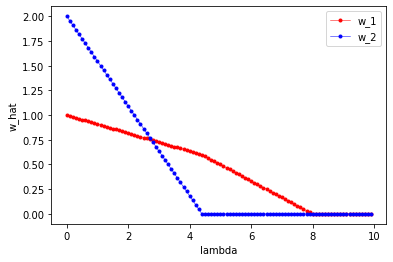

In [7]:
#Problem2-2
w_hat_lam = []
lams = np.arange(0, 10, 0.1)

def st_ops(Mu,q):
    x_pro = np.zeros(Mu.shape)
    for i in range(len(Mu)):
        if Mu[i] > q:
            x_pro[i] = Mu[i]-q
        else:
            if Mu[i] > -q:
                x_pro[i] = 0
            else:
                x_pro[i] = Mu[i]+q
    return x_pro


for lam in lams:
    ### implement PG ###
    x_1 = np.arange(-1.5, 3, 0.01)
    x_2 = np.arange(-1.5, 3, 0.02)

    X1,X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
    fValue = np.zeros((len(x_1),len(x_2)))

    for i in range(len(x_1)):
        for j in range(len(x_2)):
            inr = np.vstack([x_1[i],x_2[j]])
            fValue[i,j] = np.dot(np.dot((inr-Mu).T,A),(inr-Mu)) + lam*(np.abs(x_1[i])+np.abs(x_2[j]))
    
    w_lasso = cv.Variable((2,1))
    obj_fn = cv.quad_form(w_lasso-Mu,A) + lam*cv.norm(w_lasso,1)
    objective = cv.Minimize(obj_fn)
    constraints = []
    prob = cv.Problem(objective,constraints)
    result = prob.solve(solver=cv.CVXOPT)
    w_lasso = w_lasso.value

    
    x_init = np.array([[3],[-1]])
    L = 1.01*np.max(np.linalg.eig(2*A)[0])
    x_history = []
    xt = x_init
    for t in range(1000):
        x_history.append(xt.T)
        grad = 2*np.dot(A,xt-Mu)
        xth = xt - 1/L*grad
        xt = st_ops(xth, lam*1/L)
    
    w_hat = xt
    w_hat_lam.append(w_hat) 
    x_history = np.vstack(x_history)


w_hat_1 = []
w_hat_2 = []
for i in range(len(lams)):
    w_hat_1.append(w_hat_lam[i][0])
    w_hat_2.append(w_hat_lam[i][1])

plt.plot(lams, w_hat_1,'ro-',markersize=3,linewidth=0.5,label="w_1")
plt.plot(lams, w_hat_2,'bo-',markersize=3,linewidth=0.5,label="w_2")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("w_hat")

In [91]:
#dataset VI
d_d6 = 200
n_d6 = 180

groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6,d_d6)
noise_d6 = 0.5

w_d6 = np.vstack([20*np.random.randn(80,1),np.zeros((120,1)),5*np.random.rand()])
x_d6_tilde = np.hstack([x_d6,np.ones((n_d6,1))])
y_d6 = np.dot(x_d6_tilde,w_d6) + noise_d6*np.random.randn(n_d6,1)

In [92]:
#Problem2-3

def mldivide(A,b):
    piA = np.linalg.pinv(A)
    x = np.dot(piA,b)
    return x

y = y_d6
x_tilde = x_d6_tilde
w = w_d6 
noise = noise_d6
n = n_d6
d = d_d6
g = g_d6

lam = 1.0
wridge = mldivide(np.dot(x_tilde.T,x_tilde)+lam*np.eye(d+1), np.dot(x_tilde.T,y))

#cvx
west = cv.Variable((d+1,1))
#w_1~w_40,w_41~w_80,w_81~w_120,w_121~w_160,w_161~w_200がグループで、グループlassoはL2-norm
obj_fn = 0.5/n*cv.quad_form(x_tilde*west - y,np.eye(x_tilde.shape[0])) + lam*(cv.norm(west[g[0]],2.0) + \
         cv.norm(west[g[1]],2.0) + \
         cv.norm(west[g[2]],2.0) + \
         cv.norm(west[g[3]],2.0) + \
         cv.norm(west[g[4]],2.0))

objective = cv.Minimize(obj_fn)
constraints = []

prob = cv.Problem(objective,constraints)
result = prob.solve(solver=cv.CVXOPT)


x_test = np.random.randn(n,d)
x_test_tilde = np.hstack([x_test,np.ones((n,1))])
y_test = np.dot(x_test_tilde,w) + noise*np.random.randn(n,1)
y_pred = np.dot(x_test_tilde,west.value)
print(np.mean((y_pred-y_test)**2))

/home/takassh/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


10.857827339593932


Text(0.5, 0, 'w')

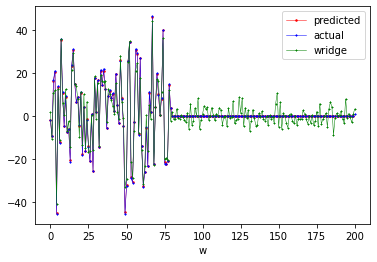

In [93]:
plt.plot(west.value[0:d],'r-o',markersize=1.5,linewidth=0.5,label="predicted")
plt.plot(w,'b-*',markersize=1.5,linewidth=0.5,label="actual")
plt.plot(wridge,'g-+',markersize=1.5,linewidth=0.5,label="wridge")
plt.legend()
plt.xlabel("w")

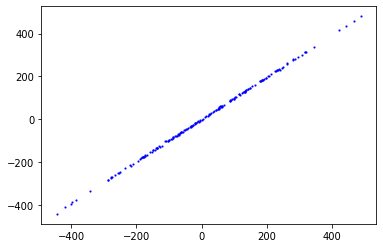

In [94]:
plt.plot(y_test,y_pred,'bs',markersize=1)

In [95]:
print('carinality of w hat: %d'%sum(np.abs(west.value) < 0.01))
print('carinality of w ground truth: %d'%sum(np.abs(w) < 0.01))

carinality of w hat: 106
carinality of w ground truth: 120


0.49504950495049505


Text(0.5, 0, 'w')

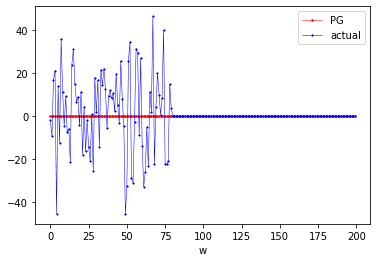

In [103]:
#PG

y = y_d6
x_tilde = x_d6_tilde
w = w_d6 
noise = noise_d6
n = n_d6
d = d_d6
g = g_d6

A = np.eye(x_tilde.shape[0])
L = 1.01*np.max(np.linalg.eig(2*A)[0])
lr = 1/L
print(lr)
lam = 1.0

def pg(Group,lr,lam):
    norm = np.linalg.norm(Group, ord=2)
    if norm == 0:
        return 0 * Group
    else :
        return max(0, 1 - lr*lam/norm) * Group
    

w_history = []
w_init = 20*np.random.randn(d+1,1)
wt = w_init
for t in range(1000):
    w_history.append(wt.T)
    grad = wt
    wth = wt - lr*grad
    for i in range(groupSize):
        wt[g[i]] = pg(wth[g[i]],lr,lam)
    wt[d] = pg(wth[d],lr,lam)


plt.plot(wt[0:d],'r-o',markersize=1.5,linewidth=0.5,label="PG")
plt.plot(w[0:d],'b-*',markersize=1.5,linewidth=0.5,label="actual")
plt.legend()
plt.xlabel("w")

In [101]:
x_test = np.random.randn(n,d)
x_test_tilde = np.hstack([x_test,np.ones((n,1))])
y_test = np.dot(x_test_tilde,w) + noise*np.random.randn(n,1)
y_pred = np.dot(x_test_tilde,wt)
print(np.mean((y_pred-y_test)**2))

111804.68880962156
